In [292]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [258]:
address = pd.read_csv('address.csv')
main = pd.read_csv('main.csv')
paid_record = pd.read_csv('paid_record.csv')

In [259]:
main.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809


In [260]:
paid_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [261]:
address.head()

,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"


In [262]:
list_of_ids = paid_record['ID'].unique()
list_of_useless_ids = []
for id_no in list_of_ids:
    loop_df = paid_record[paid_record['ID']==id_no]
    length = len(loop_df)
    length_of_x = len(loop_df[loop_df['STATUS']=='X'])
    if length == length_of_x:
        list_of_useless_ids.append(id_no)
main = main[~main['Main_ID'].isin(list_of_useless_ids)]

In [263]:
import pandas as pd
import numpy as np
address = pd.read_csv('address.csv')
main = pd.read_csv('main.csv')
paid_record = pd.read_csv('paid_record.csv')
paid_record = paid_record[paid_record['STATUS']!='X']
def calculator(row):
    if (row ['0']+ row['1'] + row['2'] + row['3'] + row['4'] + row['5'])>2:
        return 0
    else:
        return 1
list_of_dfs = []
for status in paid_record['STATUS'].unique():
    a = paid_record[paid_record['STATUS']==status].groupby('ID').count()['STATUS']
    list_of_dfs.append(a)
    
 
count_df = pd.concat(list_of_dfs, axis = 1)
count_df.columns = paid_record['STATUS'].unique()
count_df = count_df.reset_index()
count_df.fillna(0, inplace=True)
count_df['target'] = count_df.apply(lambda row: calculator(row), axis=1)
total_df = pd.merge(count_df[['ID','target']],main, left_on='ID', right_on='Main_ID')
main = total_df

In [264]:
for column in main.columns:
    print(main[column].value_counts(dropna=False))

5008929    2
5008954    2
5008860    2
5008980    2
5008994    2
          ..
5023070    1
5029213    1
5145946    1
5087743    1
5048319    1
Name: ID, Length: 33110, dtype: int64
0    28224
1     5053
Name: target, dtype: int64
F      21785
M      10675
NaN      817
Name: CODE_GENDER, dtype: int64
N      20226
Y      12228
NaN      823
Name: FLAG_OWN_CAR, dtype: int64
Y      21871
N      10580
NaN      826
Name: FLAG_OWN_REALTY, dtype: int64
0.0     22495
1.0      6610
2.0      2922
NaN       813
3.0       368
4.0        49
5.0        14
14.0        3
7.0         2
19.0        1
Name: CNT_CHILDREN, dtype: int64
135000.0    3816
180000.0    2765
157500.0    2733
112500.0    2679
225000.0    2614
            ... 
165150.0       1
531000.0       1
191700.0       1
191250.0       1
147150.0       1
Name: AMT_INCOME_TOTAL, Length: 260, dtype: int64
Working                 16725
Commercial associate     7485
Pensioner                5531
State servant            2680
NaN                   

In [265]:
f0 = ['CODE_GENDER']
for i in f0:
    main[i] = main[i].replace('M',1)
    main[i] = main[i].replace('F',0)
for i in f0:
    main[i] = main[i].replace(np.nan,main[i].median())
    
f = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for i in f:
    main[i] = main[i].replace('Y',1)
    main[i] =main[i].replace('N',0)
for i in f:
    main[i] = main[i].replace(np.nan,main[i].median())

main['CNT_CHILDREN'] = main['CNT_CHILDREN'].replace(np.nan,main['CNT_CHILDREN'].median())
main['AMT_INCOME_TOTAL'] = main['AMT_INCOME_TOTAL'].replace(np.nan,main['AMT_INCOME_TOTAL'].median())

main['NAME_FAMILY_STATUS'] = main['NAME_FAMILY_STATUS'].replace('Civil marriage','Married')

f = ['NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for i in f:
    b = main[i].unique()
    a= range(len(main[i].unique()))
    d = dict(zip(b,a))
    main[i]=main[i].replace(d)

main['DAYS_EMPLOYED'] = main['DAYS_EMPLOYED'].replace(365243.0,main['DAYS_EMPLOYED'].median())
main['DAYS_EMPLOYED'] = main['DAYS_EMPLOYED'].replace(np.nan,main['DAYS_EMPLOYED'].median())

f = ['FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_MOBIL','FLAG_EMAIL']
for i in f:
    main[i] = main[i].replace(np.nan,main[i].median())
    
def birth_date_cleanser(date):
    try:
        return str(date.split('/')[2])
    except(Exception):
            return 0
        
main['DAYS_BIRTH_CLEAN'] = main['DAYS_BIRTH_CLEAN'].astype(str).apply(lambda x: birth_date_cleanser(x))
main['CNT_FAM_MEMBERS'] = main['CNT_FAM_MEMBERS'].replace(np.nan,main['CNT_FAM_MEMBERS'].median())

In [266]:
main = main.drop('Letter', axis=1)

In [267]:
main.columns

Index(['ID', 'target', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH_CLEAN',
       'Main_ID'],
      dtype='object')

In [268]:
main.head()

,ID,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Main_ID
0,5008804,1,1.0,1.0,1.0,0.0,427500.0,0,0,0,0,-4542.0,1.0,1.0,0.0,0.0,0,2.0,1990,5008804
1,5008804,1,0.0,0.0,1.0,1.0,90000.0,1,1,0,1,-3659.0,1.0,0.0,0.0,0.0,1,3.0,1984,5008804
2,5008805,1,1.0,1.0,1.0,0.0,427500.0,0,0,0,0,-4542.0,1.0,1.0,0.0,0.0,0,2.0,1990,5008805
3,5008805,1,1.0,0.0,1.0,0.0,180000.0,0,0,0,2,-390.0,1.0,0.0,0.0,0.0,2,2.0,1995,5008805
4,5008806,0,1.0,1.0,1.0,0.0,112500.0,0,1,0,1,-1134.0,1.0,0.0,0.0,0.0,3,2.0,1964,5008806


In [296]:
X = main.drop(['ID','target','Main_ID'], axis=1)
y = main['target']

In [270]:
for column in X.columns:
    print(X[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Model to maximize f1 :
Accuracy: 0.466118
Precision: 0.162158
Recall: 0.603800
F1 score: 0.255656
Feature coefficients: [[ 7.22290171e-06 -3.53683694e-05  3.60164341e-05 -8.05022282e-06
  -9.51279456e-07 -3.76657321e-07 -1.01829483e-05  7.05669420e-05
   2.00513881e-05  2.71597605e-05  6.48938636e-06 -2.72427893e-06
  -7.26001195e-06 -9.61847622e-06  1.83926408e-05 -3.60919164e-05
   1.20062205e-04]]
ROC AUC score: 0.5354498375889045


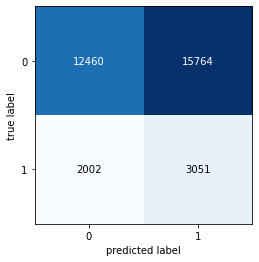

In [282]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

#metrics = ['accuracy','recall','precision','f1']
metrics = ['f1']

for m in metrics:
    print('Model to maximize',m,':')
    lrcv = LogisticRegressionCV(solver = 'liblinear', penalty = 'l2',scoring = m,cv=5, class_weight='balanced').fit(X,y)
    pred = lrcv.predict(X)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y, pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y, pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y, pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y, pred)
    print('F1 score: %f' % f1)
    print('Feature coefficients:',lrcv.coef_)
    cf_matrix = confusion_matrix(y, pred)
    fig, ax = plot_confusion_matrix(conf_mat=cf_matrix)
    #plt.show()
    print('ROC AUC score:',roc_auc_score(y, lrcv.predict_proba(X)[:, 1]))

In [272]:
main['target'].value_counts(dropna=False)

0    28224
1     5053
Name: target, dtype: int64

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Accuracy: 0.935489
Precision: 0.851216
Recall: 0.695261
F1 score: 0.765375
ROC AUC score: 0.9108683534186153


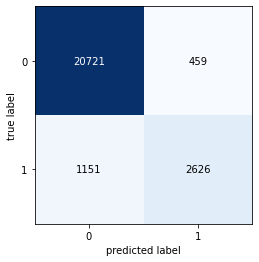

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=250,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, pred)
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred)
print('F1 score: %f' % f1)
print('ROC AUC score:',roc_auc_score(y, ada_clf.predict_proba(X)[:, 1]))

In [293]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = ada_clf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: Length of passed values is 17, index implies 19.

Accuracy: 0.848317
Precision: 0.508353
Recall: 0.333856
F1 score: 0.403027
ROC AUC score: 0.7017439306713378


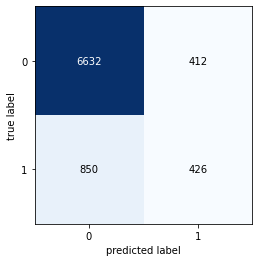

In [287]:
pred = ada_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)
print('ROC AUC score:',roc_auc_score(y_test, ada_clf.predict_proba(X_test)[:, 1]))

In [284]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y, pred)

0.7865686822010947

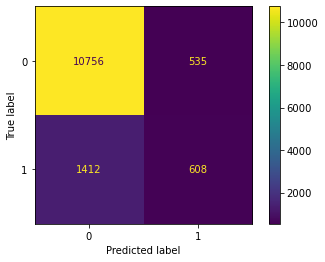

In [297]:
total_df = main
from sklearn.ensemble import RandomForestClassifier


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)


cm = confusion_matrix(y_test, y_predict)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [303]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_predict)
print('F1 score: %f' % f1)
print('ROC AUC score:',roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Accuracy: 0.8537299977462249
Precision: 0.531933508311461
Recall: 0.300990099009901
F1 score: 0.384445
ROC AUC score: 0.7308150669375678


In [291]:
main.to_csv('cleaned.csv')

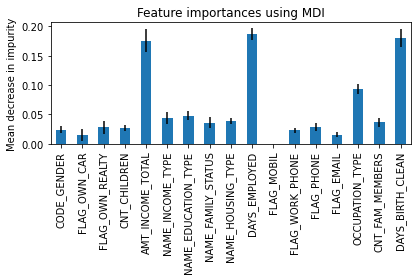

In [300]:
import matplotlib.pyplot as plt
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

columns = total_df.columns.drop('target')
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#figures

In [ ]:
sns.scatterplot(data = total_df, x = 'AMT_INCOME_TOTAL', y = 'OCCUPATION_TYPE', hue='target')
sns.histplot(x= total_df['AMT_INCOME_TOTAL'], hue=total_df['target'])
sns.scatterplot(data = total_df, x = 'AMT_INCOME_TOTAL', y = 'DAYS_EMPLOYED', hue='target')
sns.histplot(x= total_df['NAME_FAMILY_STATUS'], hue=total_df['target'])